In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
#%%

import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import pandas as pd
import numpy as np

In [2]:
# change working directory
os.chdir('/media/usuario/Datos/eve/ifibyne/1_Genomic/2_OurProjects/2_HNF1B/bulkRNA-seq/venn diagrams/filtered_2021-07-02')

In [80]:
# función para ver qué genes están en común (de la lista total) y de los markers que estamos evaluando y luego plotea el diagrama de venn
# seleccionar toda la función y correrla al principio
def venn(het, hom, title):
    
    global genes_het
    global genes_hom
    global genes_both
    
    # elegir la columna con los nombres de los genes, del data frame total
    het = het['GENEID'].tolist()
    hom = hom['GENEID'].tolist()
    
    # ver qué genes están en común (de la lista total) y los imprime en la consola de python para poder verlos   
    genes_het = set(het) - set(hom)
#    print('genes het: ', genes_het)
    genes_hom = set(hom) - set(het)
#    print('genes hom: ', genes_hom)
    genes_both = set(het) & set(hom)
#    print('genes both: ', genes_both)
    
    # ver qué markers (de la lista que le pasamos) están en común   
    markers_in_het = set(genes_het) & set(markers)
    markers_in_hom = set(genes_hom) & set(markers)
    markers_in_both = set(genes_both) & set(markers)
    
    # diagrama de venn 
    fig = plt.figure()
    v = venn2([set(het), set(hom)], set_labels = ('Het vs WT', 'Hom vs WT'), set_colors = ('red', 'green'), alpha = 0.5)
    c = venn2_circles(subsets = [set(het), set(hom)], linewidth=0)
    
    for text in v.set_labels:
        text.set_fontsize(16);
    for text in v.subset_labels:
        text.set_fontsize(16)
    
    #v.get_patch_by_id('01').set_edgecolor('red')
    #c[0].set_edgecolor('red')
    #c[1].set_edgecolor('green')
        
    # título del plot
    plt.title(title, y=1.2)
    
    # anotar los markers en cada sector 
    plt.annotate('\n'.join(markers_in_het), xy=v.get_label_by_id('10').get_position() + np.array([-0.05, 0]), xytext=(-50,0),
                 ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.1),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',color='gray'))
     
    if v.get_label_by_id('11') != None:    
        plt.annotate('\n'.join(markers_in_both), xy=v.get_label_by_id('11').get_position() + np.array([0, 0.05]), xytext=(-80,120),
                     ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.1),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',color='gray'))
        
    plt.annotate('\n'.join(markers_in_hom), xy=v.get_label_by_id('01').get_position() + np.array([0.05, 0.05]), xytext=(120,0),
                 ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.1),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',color='gray'))
     
    plt.show()
    
    fig.savefig(title+'.pdf', bbox_inches='tight')
    

In [9]:
#'IFI16',  'DLK1', 'FGFR2',  'TTR', 'FRZB',  'NOTCH2', 
#'TOP2A', 'AURKB', 'CPA2', 'DLL1',   'BICC2', 'BICC1'
   
# markers a evaluar, modificarlos a piaccere
markers = ['ETV5', 'DACH1', 'SOX4', 'SOX11', 'HMGA2', 'PDX1', 'HNF1B', 'SOX9', 'PTF1A',
           'NKX6-1', 'ONECUT1', 'SOX2','ONECUT2', 'RFX6',  'SOX21', 
           'NEUROG3', 'GATA4', 'SOX17', 'HNF4A', 'HNF1A', 
           'FOXA2', 'NEUROD1','CDX2', 'RBPJ',  'FEV']
           
          


In [7]:

# =============================================================================
# SI QUERÉS HACER SÓLO ALGUNO, CORRER LO SIGUIENTE:
# por ejemplo para day6, Downregulated:
het_down = pd.read_csv('het_wt_13_down_filtered.csv', sep=',')
hom_down = pd.read_csv('hom_wt_13_down_filtered.csv', sep=',')

het_up = pd.read_csv('het_wt_13_up_filtered.csv', sep=',')
hom_up = pd.read_csv('hom_wt_13_up_filtered.csv', sep=',')

# =============================================================================


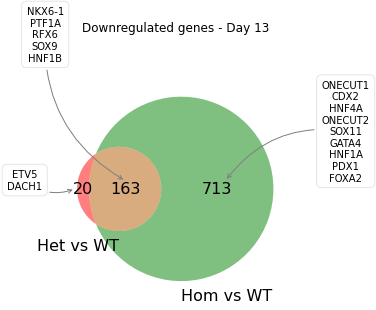

In [16]:
venn(het_down, hom_down, 'Downregulated genes - Day 13')

In [12]:
genes_venDiagram_D13_Down = pd.DataFrame({'het':pd.Series(list(genes_het)), 
                                          'both':pd.Series(list(genes_both)),
                                          'hom':pd.Series(list(genes_hom))})
genes_venDiagram_D13_Down.to_csv('genes_venDiagram_D13_Down.csv')

NameError: name 'genes_het' is not defined

In [93]:
markers = [
           # GO:0007507~heart development:
           'FOXC1', 'GATA5', 'GLI3', 'GLI2', 'TRPS1', 
           'OSR1', 'WT1', 'MIXL1',
           
           # GO:0008285~negative regulation of cell proliferation:
           'RARG', 'RERG', 'JUN', 'TGFB1I1', 'ZNF503',
          
           # GO:0007399~nervous system development:
           'BARX2', 'NRG1', 'ZEB2',
          
           # GO:0001822~kidney development:
           'WT1', 'ARID5B', 'SIX1', 'TCF21',
            
           'PITX1', 'HOXB13']


AttributeError: 'NoneType' object has no attribute 'set_fontsize'

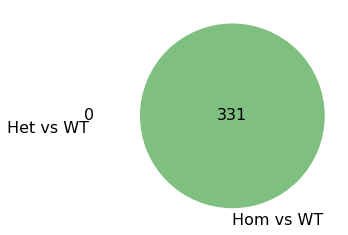

In [10]:
venn(het_up, hom_up, 'Upregulated genes - Day 13')

In [33]:
genes_venDiagram_D13_Up = pd.DataFrame({'het':pd.Series(list(genes_het)), 
                                          'both':pd.Series(list(genes_both)),
                                          'hom':pd.Series(list(genes_hom))})
genes_venDiagram_D13_Up.to_csv('genes_venDiagram_D13_Up.csv')

In [6]:
# change working directory
os.chdir('/media/usuario/Datos/eve/ifibyne/1_Genomic/2_OurProjects/2_HNF1B/bulkRNA-seq/venn diagrams/filtered_2021-11-1')

In [81]:

# =============================================================================

het_down6 = pd.read_csv('het_wt_6_down_filtered.csv', sep=',')
hom_down6 = pd.read_csv('hom_wt_6_down_filtered.csv', sep=',')

het_up6 = pd.read_csv('het_wt_6_up_filtered.csv', sep=',')
hom_up6 = pd.read_csv('hom_wt_6_up_filtered.csv', sep=',')

# =============================================================================


In [82]:
  
# markers a evaluar, modificarlos a piaccere
markers = ['ETV5', 'DACH1', 'SOX4', 'SOX11', 'HMGA2', 'PDX1', 'HNF1B', 'SOX9', 'PTF1A',
           'IFI16',  'DLK1', 'FGFR2',  'TTR', 'FRZB',  'NOTCH2', 
           'TOP2A', 'AURKB', 'CPA2', 'DLL1',   'BICC2', 'BICC1',
           'NKX6-1', 'ONECUT1', 'SOX2','ONECUT2', 'RFX6',  'SOX21', 
           'NEUROG3', 'GATA4', 'SOX17', 'HNF4A', 'HNF1A', 'HHEX', 'HNF4A', 'FGFR4', 'HHEX', 'SFRP5',
           'FOXA2', 'NEUROD1','CDX2', 'RBPJ',  'FEV', 'HNF1A-AS1', 'ZNF486', 'ZNF382']
           
    

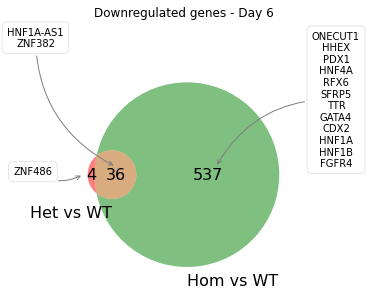

In [83]:
venn(het_down6, hom_down6, 'Downregulated genes - Day 6')

In [84]:
genes_venDiagram_D6_Down = pd.DataFrame({'het':pd.Series(list(genes_het)), 
                                          'both':pd.Series(list(genes_both)),
                                          'hom':pd.Series(list(genes_hom))})
genes_venDiagram_D6_Down.to_csv('genes_venDiagram_D6_Down.csv')

In [85]:
genes_venDiagram_D6_Up = pd.DataFrame({'het':pd.Series(list(genes_het)), 
                                          'both':pd.Series(list(genes_both)),
                                          'hom':pd.Series(list(genes_hom))})
genes_venDiagram_D6_Up.to_csv('genes_venDiagram_D6_Up.csv')

In [91]:

# =============================================================================

het_down8 = pd.read_csv('het_wt_8_down_filtered.csv', sep=',')
hom_down8 = pd.read_csv('hom_wt_8_down_filtered.csv', sep=',')

het_up8 = pd.read_csv('het_wt_8_up_filtered.csv', sep=',')
hom_up8 = pd.read_csv('hom_wt_8_up_filtered.csv', sep=',')

# =============================================================================


In [92]:
  
# markers a evaluar, modificarlos a piaccere
markers = ['ETV5', 'DACH1', 'SOX4', 'SOX11', 'HMGA2', 'PDX1', 'HNF1B', 'SOX9', 'PTF1A',
           'IFI16',  'DLK1', 'FGFR2',  'TTR', 'FRZB',  'NOTCH2', 
           'TOP2A', 'AURKB', 'CPA2', 'DLL1',   'BICC2', 'BICC1',
           'NKX6-1', 'ONECUT1', 'SOX2','ONECUT2', 'RFX6',  'SOX21', 'MAFA',
           'NEUROG3', 'GATA4', 'SOX17', 'HNF4A', 'HNF1A', 'HHEX', 'HNF4A', 'FGFR4', 'HHEX', 'SFRP5',
           'FOXA2', 'NEUROD1','CDX2', 'RBPJ',  'FEV', 'HNF1A-AS1', 'ZNF486', 'ZNF382']
           
    

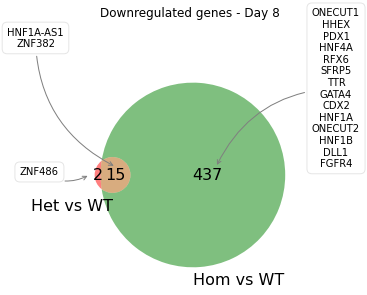

In [93]:
venn(het_down8, hom_down8, 'Downregulated genes - Day 8')

In [89]:
genes_venDiagram_D8_Down = pd.DataFrame({'het':pd.Series(list(genes_het)), 
                                          'both':pd.Series(list(genes_both)),
                                          'hom':pd.Series(list(genes_hom))})
genes_venDiagram_D8_Down.to_csv('genes_venDiagram_D8_Down.csv')

In [90]:
genes_venDiagram_D8_Up = pd.DataFrame({'het':pd.Series(list(genes_het)), 
                                          'both':pd.Series(list(genes_both)),
                                          'hom':pd.Series(list(genes_hom))})
genes_venDiagram_D8_Up.to_csv('genes_venDiagram_D8_Up.csv')